<a href="https://colab.research.google.com/github/midounai/tesla-stock-analysis/blob/main/%E7%89%B9%E6%96%AF%E6%8B%89%E8%82%A1%E5%83%B9%E5%88%86%E6%9E%90_%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [96]:

import yfinance as yf
import matplotlib.pyplot as plt

stockid = ['TSLA','NIO','BZ=F','CHPT']
for i in range(4):
    stock = yf.download(stockid[i], "2019-09-16", "2023-02-02")
    stock.head()
    stock.to_csv("stock"+ stockid[i] +".csv")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [98]:
TSLA = pd.read_csv("stockTSLA.csv")
BZ = pd.read_csv("stockBZ=F.csv")
NIO = pd.read_csv("stockNIO.csv")
CHPT = pd.read_csv("stockCHPT.csv")


In [99]:
print(TSLA.head())
print(BZ.head())
print(NIO.head())
print(CHPT.head())

                        Date       Open       High        Low      Close  \
0  2019-09-16 00:00:00-04:00  16.400000  16.495333  16.077999  16.187332   
1  2019-09-17 00:00:00-04:00  16.164667  16.373333  16.024668  16.319332   
2  2019-09-18 00:00:00-04:00  16.333332  16.544666  16.158001  16.232668   
3  2019-09-19 00:00:00-04:00  16.400000  16.529333  16.322666  16.440001   
4  2019-09-20 00:00:00-04:00  16.432667  16.463333  15.877333  16.041332   

   Adj Close    Volume  
0  16.187332  70921500  
1  16.319332  57981000  
2  16.232668  62553000  
3  16.440001  71937000  
4  16.041332  95295000  
                        Date       Open       High        Low      Close  \
0  2019-09-16 00:00:00-04:00  67.000000  71.000000  64.779999  69.019997   
1  2019-09-17 00:00:00-04:00  68.169998  69.250000  63.560001  64.550003   
2  2019-09-18 00:00:00-04:00  64.250000  64.989998  63.070000  63.599998   
3  2019-09-19 00:00:00-04:00  63.650002  65.570000  63.470001  64.400002   
4  2019-09-20

In [100]:
CLOSE = pd.concat([pd.DataFrame(TSLA)["Close"],pd.DataFrame(BZ)["Close"],pd.DataFrame(NIO)["Close"],pd.DataFrame(CHPT)["Close"]],axis=1)
CLOSE

,Close,Close,Close,Close
0,16.187332,69.019997,3.12,9.76
1,16.319332,64.550003,3.18,9.76
2,16.232668,63.599998,3.08,9.72
3,16.440001,64.400002,3.10,9.72
4,16.041332,64.279999,3.04,9.85
...,...,...,...,...
847,160.270004,87.470001,12.17,11.30
848,177.899994,86.660004,12.71,12.16
849,166.660004,84.900002,12.02,11.70
850,173.220001,84.489998,12.07,12.14


In [101]:
CLOSE.columns.values[0:4]=["TSLAClose","BZClose","NIOClose","CHPTClose"]
CLOSE

,TSLAClose,BZClose,NIOClose,CHPTClose
0,16.187332,69.019997,3.12,9.76
1,16.319332,64.550003,3.18,9.76
2,16.232668,63.599998,3.08,9.72
3,16.440001,64.400002,3.10,9.72
4,16.041332,64.279999,3.04,9.85
...,...,...,...,...
847,160.270004,87.470001,12.17,11.30
848,177.899994,86.660004,12.71,12.16
849,166.660004,84.900002,12.02,11.70
850,173.220001,84.489998,12.07,12.14


In [102]:
CLOSE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TSLAClose  852 non-null    float64
 1   BZClose    852 non-null    float64
 2   NIOClose   852 non-null    float64
 3   CHPTClose  852 non-null    float64
dtypes: float64(4)
memory usage: 26.8 KB


In [103]:
CLOSE.fillna(method='ffill', inplace=True)

In [104]:
CLOSE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852 entries, 0 to 851
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TSLAClose  852 non-null    float64
 1   BZClose    852 non-null    float64
 2   NIOClose   852 non-null    float64
 3   CHPTClose  852 non-null    float64
dtypes: float64(4)
memory usage: 26.8 KB


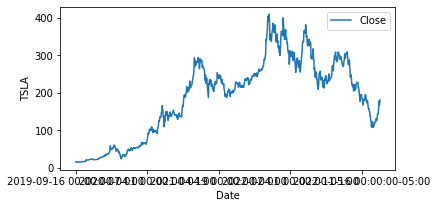

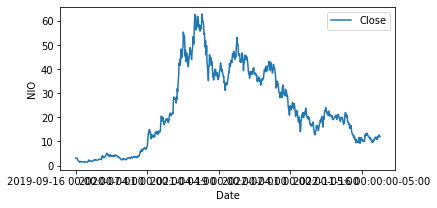

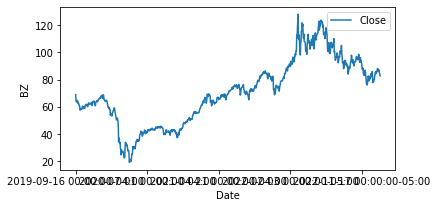

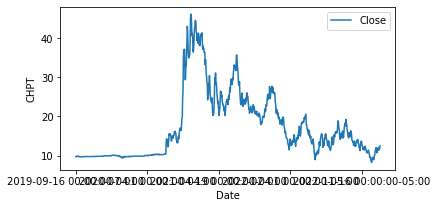

In [106]:
TSLA.plot('Date','Close', figsize = (6, 3),ylabel="TSLA")
NIO.plot('Date','Close', figsize = (6, 3),ylabel="NIO")
BZ.plot('Date','Close', figsize = (6, 3),ylabel="BZ")
CHPT.plot('Date','Close', figsize = (6, 3),ylabel="CHPT")

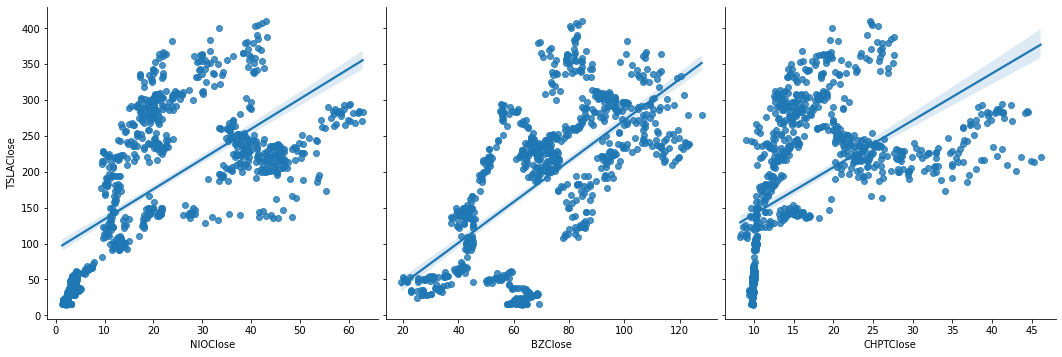

In [107]:
ax = sns.pairplot(data=CLOSE,y_vars=['TSLAClose'],
                  x_vars=['NIOClose','BZClose','CHPTClose'],
                  kind='reg',height=5,
                  )

In [108]:
corr_df = CLOSE.corr()

print("相關矩陣:")
print(corr_df, "\n")

相關矩陣:
           TSLAClose   BZClose  NIOClose  CHPTClose
TSLAClose   1.000000  0.646057  0.653899   0.532749
BZClose     0.646057  1.000000  0.093246   0.020175
NIOClose    0.653899  0.093246  1.000000   0.912748
CHPTClose   0.532749  0.020175  0.912748   1.000000 



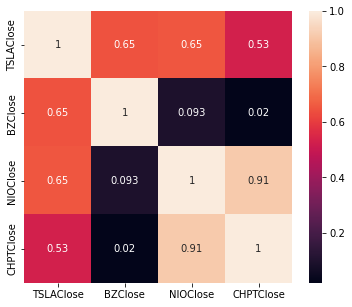

In [109]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_df, annot=True)
plt.show()

In [110]:
columns_X = set(CLOSE.columns) - {'TSLAClose'} 
X = CLOSE[columns_X]
X.head()

,BZClose,CHPTClose,NIOClose
0,69.019997,9.76,3.12
1,64.550003,9.76,3.18
2,63.599998,9.72,3.08
3,64.400002,9.72,3.10
4,64.279999,9.85,3.04


In [111]:
#切分資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, CLOSE['TSLAClose'], test_size = 0.3, random_state=0)

In [112]:
print(X_train.count())
print(X_test.count())
print(y_train.count())
print(y_test.count())

BZClose      596
CHPTClose    596
NIOClose     596
dtype: int64
BZClose      256
CHPTClose    256
NIOClose     256
dtype: int64
596
256


In [113]:
import xgboost as xgb
xgbrModel=xgb.XGBRegressor()
# 使用訓練資料訓練模型
xgbrModel.fit(X_train,y_train)
# 使用訓練資料預測
predicted=xgbrModel.predict(X_train)

[06:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [114]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [115]:
print("Score: ",xgbrModel.score(X_train, y_train))

Score:  0.9798444692672423


In [116]:
print("Score: ",xgbrModel.score(X_test, y_test))

Score:  0.9389050048722369


In [117]:
scores = cross_validate(xgbrModel, X_train, y_train, cv=5,return_train_score=False)
display(scores)

[06:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:25:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'fit_time': array([0.0453968 , 0.02957058, 0.03724289, 0.03371906, 0.03007913]),
 'score_time': array([0.00171208, 0.00171971, 0.00176334, 0.00169563, 0.00199962]),
 'test_score': array([0.95733383, 0.95926286, 0.91406163, 0.97155221, 0.93816658])}

In [118]:
predicted=xgbrModel.predict(X_test)
df_com=pd.DataFrame(predicted,y_test)

In [119]:
df_com=df_com.reset_index()
df_com

,TSLAClose,0
0,288.549988,228.868225
1,283.146667,281.281281
2,222.419998,211.665543
3,312.470001,250.102234
4,235.910004,217.445038
...,...,...
251,218.633331,218.387680
252,126.786667,142.965805
253,190.949997,212.825684
254,179.050003,165.962769


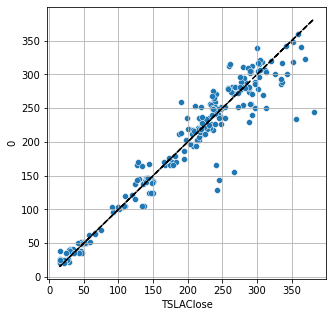

In [120]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot( x="TSLAClose",y=0,data=df_com,ax=ax)
plt.plot("TSLAClose","TSLAClose",'k--',data=df_com)
plt.grid()
plt.show()

In [121]:
display(CLOSE)

,TSLAClose,BZClose,NIOClose,CHPTClose
0,16.187332,69.019997,3.12,9.76
1,16.319332,64.550003,3.18,9.76
2,16.232668,63.599998,3.08,9.72
3,16.440001,64.400002,3.10,9.72
4,16.041332,64.279999,3.04,9.85
...,...,...,...,...
847,160.270004,87.470001,12.17,11.30
848,177.899994,86.660004,12.71,12.16
849,166.660004,84.900002,12.02,11.70
850,173.220001,84.489998,12.07,12.14


# 試著改為預測三天後的股價

In [123]:
CLOSE_3day=CLOSE
for i in range(1,4):
  CLOSE_iday = CLOSE[i:len(CLOSE)]
  CLOSE_iday=CLOSE_iday.reset_index()
  CLOSE_iday=CLOSE_iday.drop(labels='index',axis=1)
  CLOSE_3day=pd.concat([CLOSE_3day,CLOSE_iday],axis=1)
CLOSE_3day

,TSLAClose,BZClose,NIOClose,CHPTClose,TSLAClose,BZClose,NIOClose,CHPTClose,TSLAClose,BZClose,NIOClose,CHPTClose,TSLAClose,BZClose,NIOClose,CHPTClose
0,16.187332,69.019997,3.12,9.76,16.319332,64.550003,3.18,9.76,16.232668,63.599998,3.08,9.72,16.440001,64.400002,3.10,9.72
1,16.319332,64.550003,3.18,9.76,16.232668,63.599998,3.08,9.72,16.440001,64.400002,3.10,9.72,16.041332,64.279999,3.04,9.85
2,16.232668,63.599998,3.08,9.72,16.440001,64.400002,3.10,9.72,16.041332,64.279999,3.04,9.85,16.082001,64.769997,2.72,9.85
3,16.440001,64.400002,3.10,9.72,16.041332,64.279999,3.04,9.85,16.082001,64.769997,2.72,9.85,14.880667,63.099998,2.17,9.85
4,16.041332,64.279999,3.04,9.85,16.082001,64.769997,2.72,9.85,14.880667,63.099998,2.17,9.85,15.246667,62.389999,2.05,9.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,160.270004,87.470001,12.17,11.30,177.899994,86.660004,12.71,12.16,166.660004,84.900002,12.02,11.70,173.220001,84.489998,12.07,12.14
848,177.899994,86.660004,12.71,12.16,166.660004,84.900002,12.02,11.70,173.220001,84.489998,12.07,12.14,181.410004,82.839996,12.10,12.46
849,166.660004,84.900002,12.02,11.70,173.220001,84.489998,12.07,12.14,181.410004,82.839996,12.10,12.46,NaN,NaN,NaN,NaN
850,173.220001,84.489998,12.07,12.14,181.410004,82.839996,12.10,12.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:

CLOSE_3day.columns = ["TSLAClose","BZClose","NIOClose","CHPTClose",
            "TSLAClose_1day","BZClose_1day","NIOClose_1day","CHPTClose_1day",
            "TSLAClose_2day","BZClose_2day","NIOClose_2day","CHPTClose_2day",
            "TSLAClose_3day","BZClose_3day","NIOClose_3day","CHPTClose_3day"]
CLOSE_3day

,TSLAClose,BZClose,NIOClose,CHPTClose,TSLAClose_1day,BZClose_1day,NIOClose_1day,CHPTClose_1day,TSLAClose_2day,BZClose_2day,NIOClose_2day,CHPTClose_2day,TSLAClose_3day,BZClose_3day,NIOClose_3day,CHPTClose_3day
0,16.187332,69.019997,3.12,9.76,16.319332,64.550003,3.18,9.76,16.232668,63.599998,3.08,9.72,16.440001,64.400002,3.10,9.72
1,16.319332,64.550003,3.18,9.76,16.232668,63.599998,3.08,9.72,16.440001,64.400002,3.10,9.72,16.041332,64.279999,3.04,9.85
2,16.232668,63.599998,3.08,9.72,16.440001,64.400002,3.10,9.72,16.041332,64.279999,3.04,9.85,16.082001,64.769997,2.72,9.85
3,16.440001,64.400002,3.10,9.72,16.041332,64.279999,3.04,9.85,16.082001,64.769997,2.72,9.85,14.880667,63.099998,2.17,9.85
4,16.041332,64.279999,3.04,9.85,16.082001,64.769997,2.72,9.85,14.880667,63.099998,2.17,9.85,15.246667,62.389999,2.05,9.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,160.270004,87.470001,12.17,11.30,177.899994,86.660004,12.71,12.16,166.660004,84.900002,12.02,11.70,173.220001,84.489998,12.07,12.14
848,177.899994,86.660004,12.71,12.16,166.660004,84.900002,12.02,11.70,173.220001,84.489998,12.07,12.14,181.410004,82.839996,12.10,12.46
849,166.660004,84.900002,12.02,11.70,173.220001,84.489998,12.07,12.14,181.410004,82.839996,12.10,12.46,NaN,NaN,NaN,NaN
850,173.220001,84.489998,12.07,12.14,181.410004,82.839996,12.10,12.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
updown=[]
i=0
try:
  for i in range(len(CLOSE_3day)):
    if i == 0:
      updown.append(0)
    elif (CLOSE_3day['TSLAClose'][i]-CLOSE_3day['TSLAClose'][i-1]) >= 0:
      updown.append(1)
    else: 
      updown.append(0)
except:
    updown.append(0)
print(updown)

[0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [126]:
CLOSE_3day.insert(0,column="TSLAupdown", value=updown)
CLOSE_3day

,TSLAupdown,TSLAClose,BZClose,NIOClose,CHPTClose,TSLAClose_1day,BZClose_1day,NIOClose_1day,CHPTClose_1day,TSLAClose_2day,BZClose_2day,NIOClose_2day,CHPTClose_2day,TSLAClose_3day,BZClose_3day,NIOClose_3day,CHPTClose_3day
0,0,16.187332,69.019997,3.12,9.76,16.319332,64.550003,3.18,9.76,16.232668,63.599998,3.08,9.72,16.440001,64.400002,3.10,9.72
1,1,16.319332,64.550003,3.18,9.76,16.232668,63.599998,3.08,9.72,16.440001,64.400002,3.10,9.72,16.041332,64.279999,3.04,9.85
2,0,16.232668,63.599998,3.08,9.72,16.440001,64.400002,3.10,9.72,16.041332,64.279999,3.04,9.85,16.082001,64.769997,2.72,9.85
3,1,16.440001,64.400002,3.10,9.72,16.041332,64.279999,3.04,9.85,16.082001,64.769997,2.72,9.85,14.880667,63.099998,2.17,9.85
4,0,16.041332,64.279999,3.04,9.85,16.082001,64.769997,2.72,9.85,14.880667,63.099998,2.17,9.85,15.246667,62.389999,2.05,9.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,1,160.270004,87.470001,12.17,11.30,177.899994,86.660004,12.71,12.16,166.660004,84.900002,12.02,11.70,173.220001,84.489998,12.07,12.14
848,1,177.899994,86.660004,12.71,12.16,166.660004,84.900002,12.02,11.70,173.220001,84.489998,12.07,12.14,181.410004,82.839996,12.10,12.46
849,0,166.660004,84.900002,12.02,11.70,173.220001,84.489998,12.07,12.14,181.410004,82.839996,12.10,12.46,NaN,NaN,NaN,NaN
850,1,173.220001,84.489998,12.07,12.14,181.410004,82.839996,12.10,12.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
CLOSE_3day=CLOSE_3day.dropna()
CLOSE_3day

,TSLAupdown,TSLAClose,BZClose,NIOClose,CHPTClose,TSLAClose_1day,BZClose_1day,NIOClose_1day,CHPTClose_1day,TSLAClose_2day,BZClose_2day,NIOClose_2day,CHPTClose_2day,TSLAClose_3day,BZClose_3day,NIOClose_3day,CHPTClose_3day
0,0,16.187332,69.019997,3.12,9.76,16.319332,64.550003,3.18,9.76,16.232668,63.599998,3.08,9.72,16.440001,64.400002,3.10,9.72
1,1,16.319332,64.550003,3.18,9.76,16.232668,63.599998,3.08,9.72,16.440001,64.400002,3.10,9.72,16.041332,64.279999,3.04,9.85
2,0,16.232668,63.599998,3.08,9.72,16.440001,64.400002,3.10,9.72,16.041332,64.279999,3.04,9.85,16.082001,64.769997,2.72,9.85
3,1,16.440001,64.400002,3.10,9.72,16.041332,64.279999,3.04,9.85,16.082001,64.769997,2.72,9.85,14.880667,63.099998,2.17,9.85
4,0,16.041332,64.279999,3.04,9.85,16.082001,64.769997,2.72,9.85,14.880667,63.099998,2.17,9.85,15.246667,62.389999,2.05,9.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,1,143.750000,88.190002,12.06,11.87,143.889999,86.129997,11.68,11.42,144.429993,86.120003,11.63,11.41,160.270004,87.470001,12.17,11.30
845,1,143.889999,86.129997,11.68,11.42,144.429993,86.120003,11.63,11.41,160.270004,87.470001,12.17,11.30,177.899994,86.660004,12.71,12.16
846,1,144.429993,86.120003,11.63,11.41,160.270004,87.470001,12.17,11.30,177.899994,86.660004,12.71,12.16,166.660004,84.900002,12.02,11.70
847,1,160.270004,87.470001,12.17,11.30,177.899994,86.660004,12.71,12.16,166.660004,84.900002,12.02,11.70,173.220001,84.489998,12.07,12.14


In [130]:
columns_X = set(CLOSE_3day.columns) - {'TSLAClose'} - {'BZClose'} - {'CHPTClose'} - {'NIOClose'} - 	{'TSLAupdown'}
X_3day = CLOSE_3day[columns_X]
X_3day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 849 entries, 0 to 848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NIOClose_2day   849 non-null    float64
 1   CHPTClose_2day  849 non-null    float64
 2   TSLAClose_1day  849 non-null    float64
 3   NIOClose_3day   849 non-null    float64
 4   BZClose_1day    849 non-null    float64
 5   NIOClose_1day   849 non-null    float64
 6   BZClose_3day    849 non-null    float64
 7   TSLAClose_2day  849 non-null    float64
 8   TSLAClose_3day  849 non-null    float64
 9   CHPTClose_1day  849 non-null    float64
 10  CHPTClose_3day  849 non-null    float64
 11  BZClose_2day    849 non-null    float64
dtypes: float64(12)
memory usage: 86.2 KB


In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_3day, CLOSE_3day['TSLAupdown'], test_size = 0.3, random_state=0)

In [171]:
from xgboost import XGBClassifier #分類器
xgbrModel=xgb.XGBClassifier()
# 使用訓練資料訓練模型
xgbrModel.fit(X_train,y_train)
print("Score: ",xgbrModel.score(X_train, y_train))

Score:  0.8602693602693603


In [172]:
print("Score: ",xgbrModel.score(X_test, y_test))

Score:  0.5254901960784314


相關矩陣:


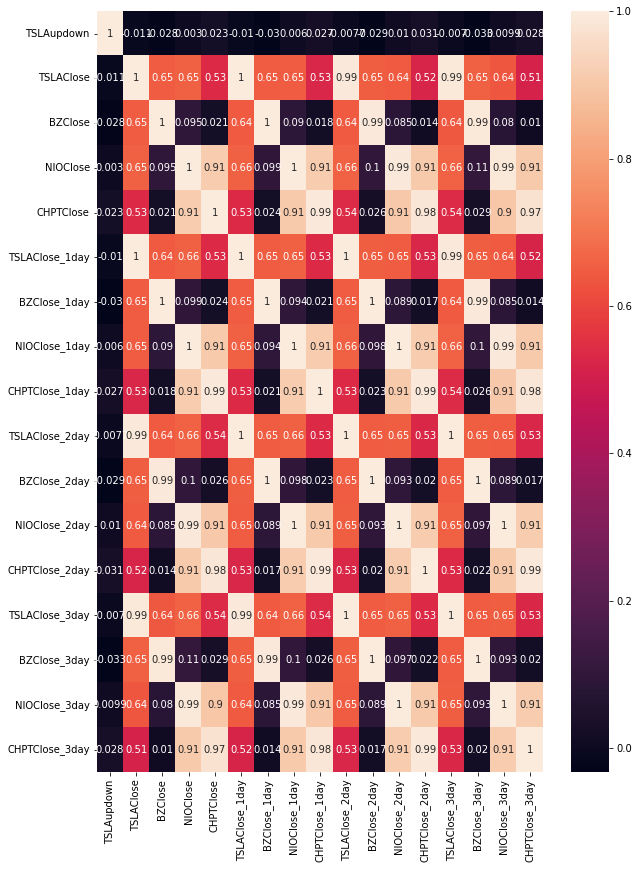

In [134]:
corr_df = CLOSE_3day.corr()

print("相關矩陣:")
plt.figure(figsize=(10, 14))
sns.heatmap(corr_df, annot=True)
plt.show()

[0.09820005 0.0953193  0.08912788 0.05552797 0.07735525 0.07437215
 0.09271558 0.08085119 0.10599042 0.06681881 0.07017962 0.09354176]


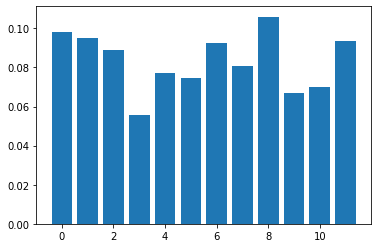

In [135]:
# 特徵重要性
print(xgbrModel.feature_importances_)
# plot
plt.bar(range(len(xgbrModel.feature_importances_)), xgbrModel.feature_importances_)
plt.show()

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(CLOSE_3day.values[:,:])

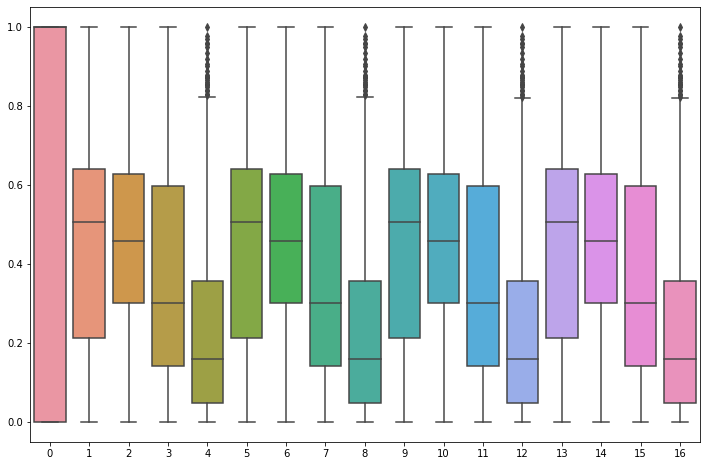

In [137]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = X_scaled, width = 0.8)
plt.show()

In [140]:
X_scaled

array([[0.        , 0.00330727, 0.45734004, ..., 0.41481823, 0.02893368,
        0.03883753],
       [1.        , 0.00364137, 0.41619882, ..., 0.41371374, 0.02795839,
        0.04227214],
       [0.        , 0.00342201, 0.4074551 , ..., 0.41822361, 0.02275683,
        0.04227214],
       ...,
       [1.        , 0.32789882, 0.61472619, ..., 0.60349746, 0.17392718,
        0.09114927],
       [1.        , 0.36799105, 0.6271514 , ..., 0.59972385, 0.17473992,
        0.10277412],
       [1.        , 0.41261384, 0.61969629, ..., 0.58453745, 0.17522757,
        0.11122854]])

In [162]:
X = pd.DataFrame(X_scaled).drop([0,1,2,3,4], axis = 1)
y = pd.DataFrame(X_scaled)[0]

In [168]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.3, random_state = 0)
xgbrModel=xgb.XGBClassifier()
# 使用訓練資料訓練模型
xgbrModel.fit(X_train_scaled,y_train_scaled)
print("Score: ",xgbrModel.score(X_train_scaled,y_train_scaled))

Score:  0.8602693602693603


In [169]:
print("Score: ",xgbrModel.score(X_test_scaled, y_test_scaled))

Score:  0.5254901960784314


In [175]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc_eval = cross_val_score(estimator = rfc, X = X_train_scaled, y = y_train_scaled.astype('int'), cv = 5)
rfc_eval


array([0.52941176, 0.55462185, 0.46218487, 0.52941176, 0.50847458])

In [176]:
rfc_eval.mean()

0.5168209656744054

# 試用其他模型

In [177]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [204]:
model = tf.keras.models.Sequential([
    layers.Dense(32, name="hidden1"),
    layers.Dense(32, name="hidden2"),
    layers.Dense(2, name="output", activation=tf.nn.softmax),
])

In [205]:
model.compile(optimizer='sgd', loss=tf.keras.losses.categorical_crossentropy, metrics=["Accuracy"])

y_train_onehot = tf.keras.utils.to_categorical(y_train_scaled, num_classes=2)
y_test_onehot = tf.keras.utils.to_categorical(y_test_scaled, num_classes=2)

model.fit(X_train_scaled, y_train_onehot, epochs=100, batch_size=16)

Epoch 1/100
38/38 [==============================] - 1s 3ms/step - loss: 0.7297 - Accuracy: 0.4630
Epoch 2/100
38/38 [==============================] - 0s 3ms/step - loss: 0.6964 - Accuracy: 0.5185
Epoch 3/100
38/38 [==============================] - 0s 3ms/step - loss: 0.6933 - Accuracy: 0.5253
Epoch 4/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6902 - Accuracy: 0.5354
Epoch 5/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6898 - Accuracy: 0.5522
Epoch 6/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6893 - Accuracy: 0.5539
Epoch 7/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6892 - Accuracy: 0.5455
Epoch 8/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6871 - Accuracy: 0.5505
Epoch 9/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6870 - Accuracy: 0.5522
Epoch 10/100
38/38 [==============================] - 0s 2ms/step - loss: 0.6876 - Accuracy: 0.5640
Epoch 11/

In [206]:
loss, acc = model.evaluate(X_test_scaled, y_test_onehot)
print("loss_test:", loss)
print("acc_test: ", acc)

8/8 [==============================] - 0s 2ms/step - loss: 0.6974 - Accuracy: 0.5373
loss_test: 0.6974353194236755
acc_test:  0.5372549295425415


In [209]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score

# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, hidden_size)
        self.hidden2 = torch.nn.Linear(hidden_size, hidden_size)
        self.predict = torch.nn.Linear(hidden_size, output_size)

    def forward(self, x):
        output1 = torch.relu(self.hidden1(x))
        output2 = torch.relu(self.hidden2(output1))
        output = torch.sigmoid(self.predict(output2))
        return output

# 模型、優化器初始化
model = Model(X_test_scaled.shape[1], 32, 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.CrossEntropyLoss()

# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train_scaled.values, dtype=torch.float32)
y_data = torch.tensor(y_train_onehot, dtype=torch.float32)

x_test_data = torch.tensor(X_test_scaled.values, dtype=torch.float32)
y_test_data = torch.tensor(y_test_onehot, dtype=torch.float32)

In [213]:
# 訓練100回合，
for t in range(100):
    for i in range(0, len(x_data), 16):
        prediction = model(x_data[i:i+16])
        loss = loss_func(prediction, y_data[i:i+16])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # 檢測訓練資料acc有沒有上升
    loss = loss_func(model(x_data), y_data)
    print(loss)

y_pred = model(x_test_data)
y_pred = y_pred.argmax(1) # one hot array to int array

accuracy_score(y_test, y_pred) # accuracy

tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6868, grad_fn=<DivBackward1>)
tensor(0.6867, grad_fn=<DivBackward1>)
tensor(0.6867, grad_fn=<D

0.5254901960784314